In [1]:
import cv2
import numpy as np
from PIL import Image

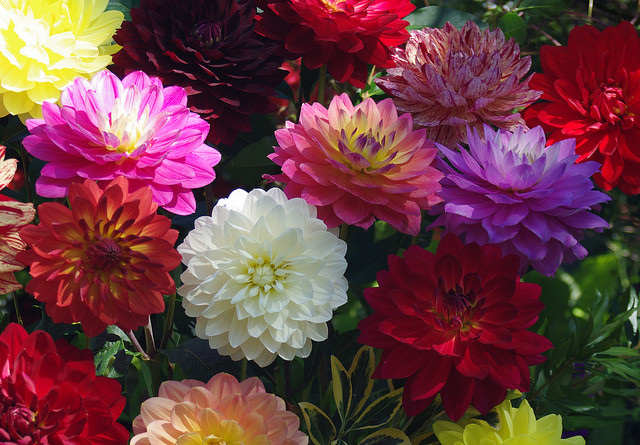

In [2]:
img  = Image.open("img/flowers.jpg")
img

In [3]:
img_array = np.array(img)

In [4]:
cx, cy, r= 200, 200, 50

In [15]:
xy_map = np.transpose(np.mgrid[0:640, 0:455],[2,1,0]).astype('float32')

dist = np.sqrt(np.sum((xy_map-(cx,cy))**2, axis=2))
area = dist < 2*r
area2 = dist < 3*r
area2 = area2 &  (~area)

xy_map[area] = (xy_map[area]-(cx,cy))/2 + (cx, cy)
unit_ratio = r/dist[area2][:, None]
xy_map[area2] = (xy_map[area2]-(cx,cy))* (2-3*unit_ratio) + (cx,cy)

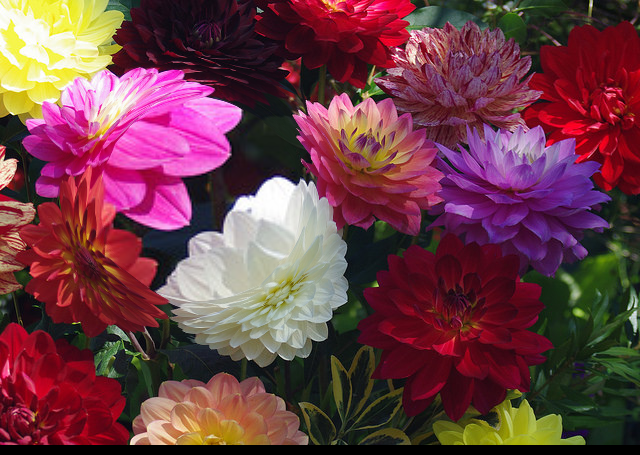

In [16]:
img_array_remap  = cv2.remap(img_array, xy_map, None, cv2.INTER_LINEAR)
Image.fromarray(img_array_remap)

In [25]:
xy_map = np.transpose(np.mgrid[0:640, 0:455],[2,1,0]).astype('float32')
xy_map[..., 1] = xy_map[..., 1]+70*np.sin(xy_map[..., 0]/40)
#xy_map[..., 1] = np.random.randint(0, 455, size=xy_map.shape[:2])

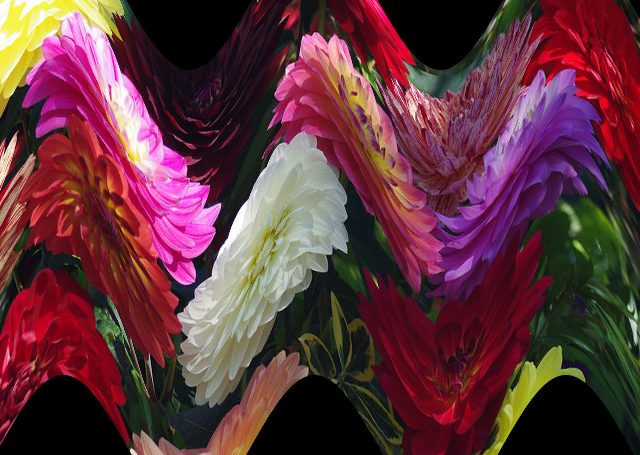

In [26]:
img_array_remap  = cv2.remap(img_array, xy_map, None, cv2.INTER_LINEAR)
Image.fromarray(img_array_remap)

In [27]:
# 讀取已經學習過的臉部偵測 haar cascade
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')


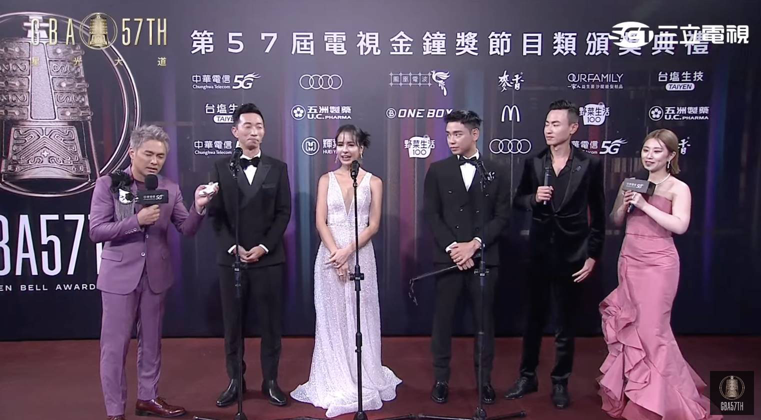

In [49]:
from urllib.request import urlopen
img = Image.open(urlopen("https://dvblobcdnjp.azureedge.net//Content/ueditor/net/upload1/2022-10/6afc5279-4721-4345-a9bd-7452caa2f340.png"))
img = Image.open(urlopen("https://dvblobcdnjp.azureedge.net//Content/ueditor/net/upload1/2022-10/e4f28caf-e5eb-4cf6-b31b-f808f3b37777.png"))
img = np.array(img)
#img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
Image.fromarray(img).resize((img.shape[1]//2, img.shape[0]//2))

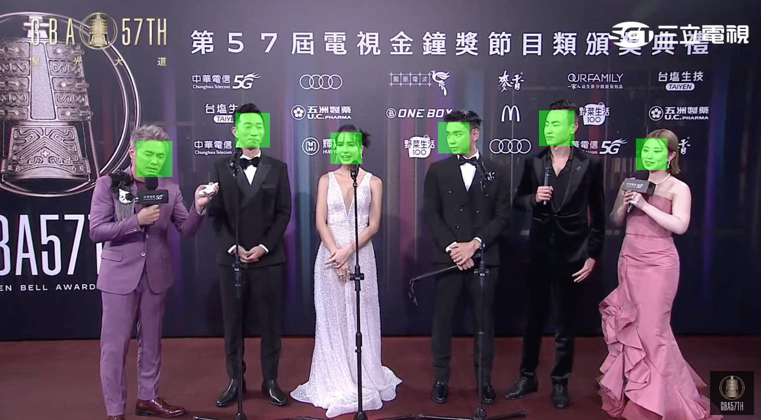

In [50]:
r1, r2 = 1.4, 2.5
# 從裡面來找找看臉吧
faces = face_cascade.detectMultiScale(gray, 1.1, 15)
xy_map = np.transpose(np.mgrid[0:img.shape[1], 0:img.shape[0]],[2,1,0]).astype('float32')
img2 = img.copy()
for (x,y,w,h) in faces:    
    img2[y:y+h, x:x+w]=(img2[y:y+h, x:x+w]*0.7+[0,127,0]).clip(0, 255)
Image.fromarray(img2).resize((img.shape[1]//2, img.shape[0]//2))


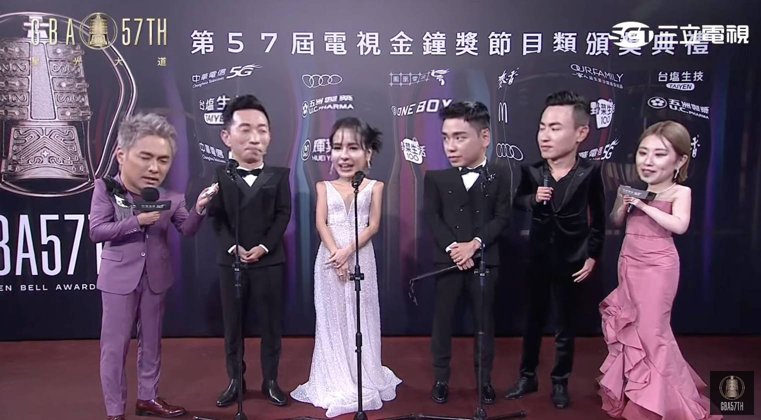

In [51]:
r1, r2 = 1.5, 2.5
# 從裡面來找找看臉吧
faces = face_cascade.detectMultiScale(gray, 1.1, 15)
xy_map = np.transpose(np.mgrid[0:img.shape[1], 0:img.shape[0]],[2,1,0]).astype('float32')
for (x,y,w,h) in faces:    
    r = (max(w,h)/2)*1.6
    cx, cy = x+w/2, y+h*0.2
    dist = np.sqrt(np.sum((xy_map-(cx,cy))**2, axis=2))
    area = dist < r1*r
    area2 = dist < r2*r
    area2 = area2 &  (~area)
    xy_map[area] = (xy_map[area]-(cx,cy))/r1 + (cx, cy)
    unit_ratio = 1/r1 + (dist[area2]/r-r1)/(r2-r1)*(1-1/r1)
    xy_map[area2] = (xy_map[area2]-(cx,cy)) * unit_ratio[..., None] + (cx,cy)

img_remap  = cv2.remap(img, xy_map, None, cv2.INTER_LINEAR)
Image.fromarray(img_remap).resize((img.shape[1]//2, img.shape[0]//2))


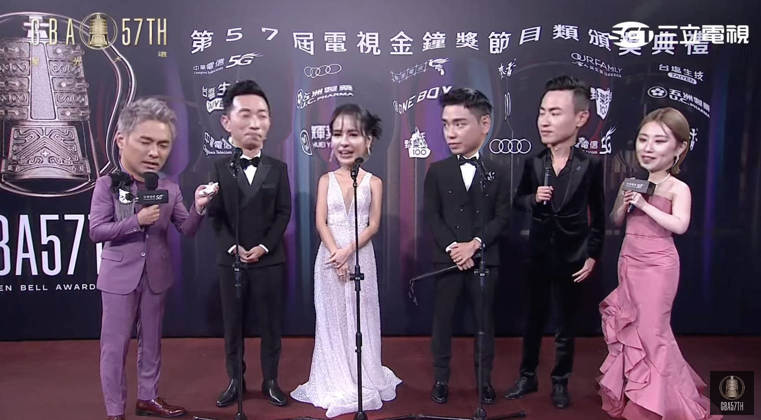

In [53]:
r1, r2 = 1.5, 2.5
# 從裡面來找找看臉吧
faces = face_cascade.detectMultiScale(gray, 1.1, 15)
xy_map = np.transpose(np.mgrid[0:img.shape[1], 0:img.shape[0]],[2,1,0]).astype('float32')
for (x,y,w,h) in faces:    
    r = (max(w,h))*0.75
    cx, cy = x+w/2, y+h*1.05
    dist = np.sqrt(np.sum((xy_map-(cx,cy))**2, axis=2))
    dist1 = np.sqrt(np.sum((xy_map-(cx,cy-r*r1))**2, axis=2))
    dist2 = np.sqrt(np.sum((xy_map-(cx,cy-r*r2))**2, axis=2))

    area = dist1 < r1*r
    area2 = dist2 <= r2*r
    area2 = area2 &  (~area)
    xy_map[area] = (xy_map[area]-(cx,cy))/r1 + (cx, cy)
    p = dist**2/(np.abs(cy-xy_map[...,1])+1e-5)/r/2
    unit_ratio = 1/r1 + (p[area2]-r1)/(r2-r1)*(1-1/r1)
    xy_map[area2] = (xy_map[area2]-(cx,cy)) * unit_ratio[..., None] + (cx,cy)

img_remap  = cv2.remap(img, xy_map, None, cv2.INTER_LINEAR)
Image.fromarray(img_remap).resize((img.shape[1]//2, img.shape[0]//2))
